In [1]:
library(lubridate)
library(dplyr)
library(ggplot2)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/home/olexandr/Downloads/Statistics_R/data_source")

In [3]:
crime <- read.csv("crimes.csv", header = TRUE)
str(crime)

'data.frame':	878049 obs. of  9 variables:
 $ Dates     : chr  "2015-05-13 23:53:00" "2015-05-13 23:53:00" "2015-05-13 23:33:00" "2015-05-13 23:30:00" ...
 $ Category  : chr  "WARRANTS" "OTHER OFFENSES" "OTHER OFFENSES" "LARCENY/THEFT" ...
 $ Descript  : chr  "WARRANT ARREST" "TRAFFIC VIOLATION ARREST" "TRAFFIC VIOLATION ARREST" "GRAND THEFT FROM LOCKED AUTO" ...
 $ DayOfWeek : chr  "Wednesday" "Wednesday" "Wednesday" "Wednesday" ...
 $ PdDistrict: chr  "NORTHERN" "NORTHERN" "NORTHERN" "NORTHERN" ...
 $ Resolution: chr  "ARREST, BOOKED" "ARREST, BOOKED" "ARREST, BOOKED" "NONE" ...
 $ Address   : chr  "OAK ST / LAGUNA ST" "OAK ST / LAGUNA ST" "VANNESS AV / GREENWICH ST" "1500 Block of LOMBARD ST" ...
 $ X         : num  -122 -122 -122 -122 -122 ...
 $ Y         : num  37.8 37.8 37.8 37.8 37.8 ...


In [4]:
crime$POSIX <- ymd_hms(as.character(crime$Dates))
crime$Dates <- as.Date(ymd_hms(as.character(crime$Dates)))

In [5]:
moon <- read.csv("moon.csv", header = TRUE)

In [6]:
moon$date <- as.Date(moon$date, "%m/%d/%Y") # Перетворимо поле date в однаковій формат із полем Dates в crime

In [7]:
full_data <- merge(crime, moon, by.x = "Dates", by.y="date")

full_data <- inner_join(crime, moon, by=c("Dates"="date"))  - альтернативний варіант join-у

In [9]:
date_phase <- full_data %>%
    group_by(Dates, phase) %>%
    count() %>%
    arrange(desc(n))

In [11]:
glimpse(date_phase)

Rows: 303
Columns: 3
Groups: Dates, phase [303]
$ Dates <date> 2013-10-04, 2003-04-01, 2003-05-01, 2006-10-06, 2013-05-17, 200…
$ phase <chr> "New Moon", "New Moon", "New Moon", "Full Moon", "First Quarter"…
$ n     <int> 555, 524, 499, 491, 486, 485, 484, 475, 472, 470, 470, 470, 470,…


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


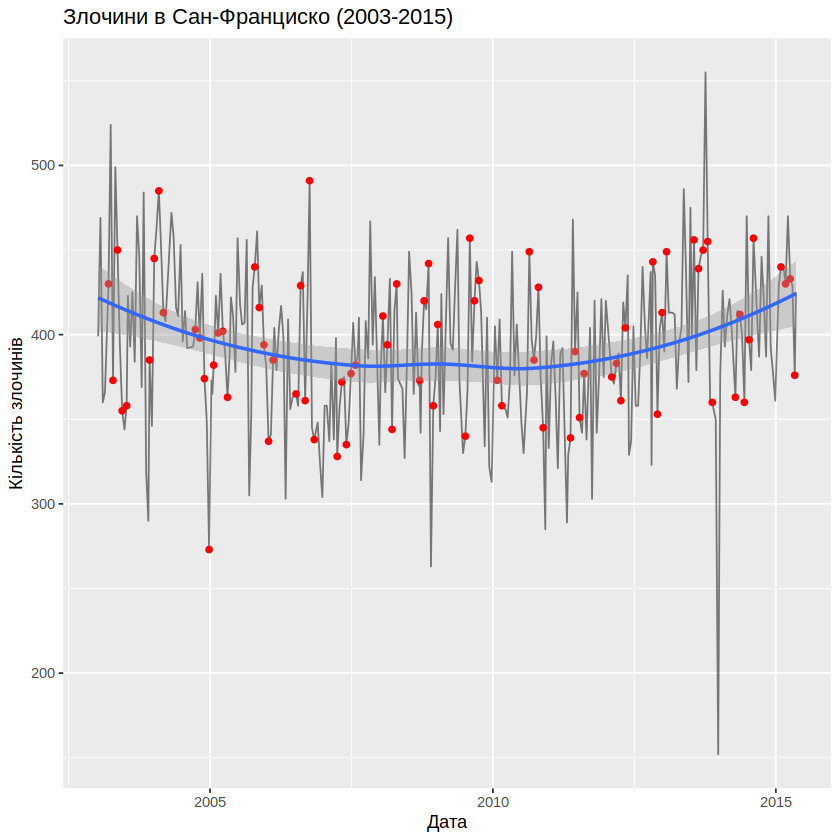

In [13]:
library(ggplot2)
    ggplot(date_phase, aes(Dates, n)) +
    geom_line(alpha = 0.5) +
    labs(title = "Злочини в Сан-Франциско (2003-2015)",
        x = "Дата",
        y = "Кількість злочинів") +
    geom_point(data = date_phase[date_phase$phase == "Full Moon", ], color = "red") +
    geom_smooth()

Поки не схоже, що в дні повного Місяця здійснюється більше
злочинів. Однак, це суб'єктивна думка. Давайте знайдемо
середні значення для днів в котрі маємо фазу повного Місяця і
решти фаз:

In [15]:
x <- mean(date_phase$n[date_phase$phase == "Full Moon"])
x

[1] 395.7273

In [17]:
mu <- mean(date_phase$n[date_phase$phase != "Full Moon"])
mu

[1] 391.7522

Будемо вважати середню кількість злочинів у дні інших
фаз оцінкою середнього значення генеральної сукупності.
Визначимо, чи середня кількість злочинів у дні повного Місяця
статистично відрізняється від цього значення.

Знайдемо розмір та середньоквадратичне відхилення нашої
вибірки:

In [19]:
n <- length(date_phase$n[date_phase$phase == "Full Moon"])
n

[1] 77

In [21]:
s <- sd(date_phase$n[date_phase$phase == "Full Moon"])
s

[1] 41.63615

Обрахуємо тестову статиситку по формулі і далі шукаємо p-value:

p_value > a(0,05), тому ми не можемо відкинути нульову гіпотезу і
вважаємо, що в дні повного Місяця середня кількість злочинів у
Сан-Франциско статистично не відрізняється від значення
391.75.

Також можемо використати функцію t-test, вказавши вектор
значень та параметри mu = 391.75, alternative ="two.sided", conf.level = 0.95.

In [26]:
x_vector <- date_phase$n[date_phase$phase == "Full Moon"]

In [28]:
t.test(x_vector, mu = 391.75, alternative = "two.sided", conf.level = 0.95)


	One Sample t-test

data:  x_vector
t = 0.83822, df = 76, p-value = 0.4045
alternative hypothesis: true mean is not equal to 391.75
95 percent confidence interval:
 386.2770 405.1775
sample estimates:
mean of x 
 395.7273 


Довірчий інтервал для кількості середньої кількості злочинів в
день
у
Сан-Франциско
[386.2770,
405.1775]
для
рівня
надійності 95% містить значення нульової гіпотези.

Отже, згідно нашого тесту, фаза Місяця не має впливає на
середнє значення кількості злочинів. Можна також дослідити,
чи впливає фаза Місяця на кількість злочинів, які можуть бути
вчинені імпульсивно.
Можливі категорії для цього можна виділити так:

In [33]:
impulsive_crimes <- c("OTHER OFFENSES", "LARCENY/THEFT", "VA
NDALISM", "DRUNKENNESS", "DRUG/NARCOTIC", "DRIVING UNDER THE
INFLUENCE", "SEX OFFENSES FORCIBLE", "RUNAWAY", "DISORDERLY
CONDUCT", "ARSON", "SUICIDE", "SEX OFFENSES NON FORCIBLE", "SUSPICIOUS OCC", "ASSAULT", "LIQUOR LAWS", "ROBBERY", "BURGL
ARY", "VEHICLE THEFT")

Самостійно дослідіть це питання.

In [31]:
# Давайте перевіримо, чи впливає день тижня на кількість злочинів.

In [35]:
day_of_week_crimes <- full_data %>%
    group_by(DayOfWeek) %>%
    count()

In [37]:
glimpse(day_of_week_crimes)

Rows: 7
Columns: 2
Groups: DayOfWeek [7]
$ DayOfWeek <chr> "Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesd…
$ n         <int> 19326, 14840, 18261, 15063, 16843, 18668, 16006


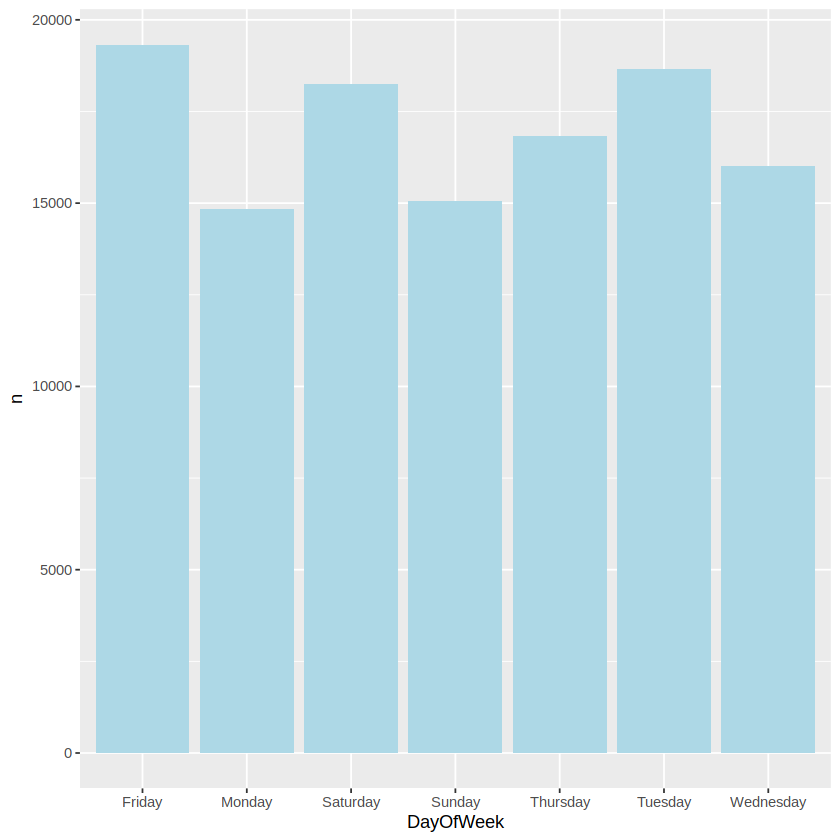

In [39]:
ggplot(data=day_of_week_crimes, aes(x=DayOfWeek, y=n)) +
    geom_bar(stat="identity", fill="lightblue")


Змінимо порядок днів, на звичний для нас.

In [41]:
day_of_week_crimes$DayOfWeek <- factor(day_of_week_crimes$DayOfWeek , levels = c("Monday", "Tuesday", "Wednesday",
"Thursday", "Friday", "Saturday", "Sunday"))

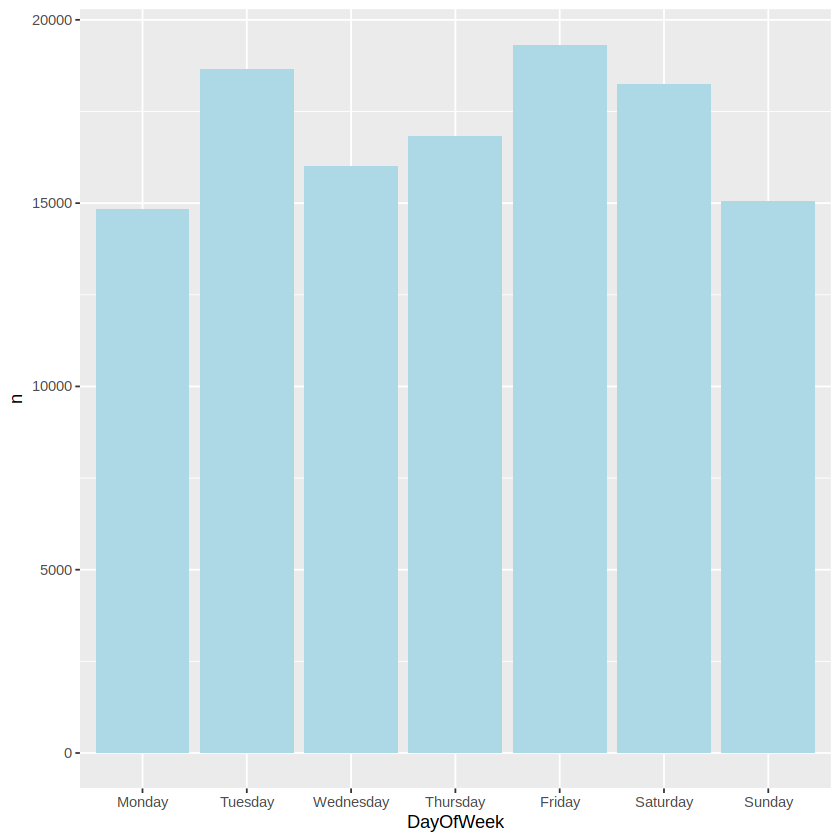

In [43]:
ggplot(data=day_of_week_crimes, aes(x=DayOfWeek, y=n)) +
    geom_bar(stat="identity", fill="lightblue")


Перевіримо, чи середня кількість злочинів, вчинених по
п'ятницях, відрізняється від середнього значення 391.75.
Встановимо a = 99%

Сформуємо нашу
вибірку
sample_vector,
яка
міститиме
значення кількості злочинів в Сан-Франциско для кожної
п'ятниці:

In [45]:
crimes_by_day <- full_data %>%
    group_by(Dates, DayOfWeek) %>%
    count()

In [47]:
sample_vector <- crimes_by_day$n[crimes_by_day$DayOfWeek == "Friday"]

In [49]:
length(sample_vector)

[1] 46

Обчислимо
середнє
значення
та
середньоквадратичне
відхилення для вибірки:

In [52]:
x <-mean(crimes_by_day$n[crimes_by_day$DayOfWeek=="Friday"])
x

[1] 420.1304

In [54]:
s <-sd(crimes_by_day$n[crimes_by_day$DayOfWeek == "Friday"])
s

[1] 43.43199

Обрахувати t-стастистику і отримали 4.4

За допомогою t.test знаходимо значення p-value, та відповідаємо на питання лабораторної

In [56]:
t_test_result <- t.test(sample_vector, alternative = "two.sided", mu = 391.75, conf.level = 0.99)

In [58]:
print(t_test_result)


	One Sample t-test

data:  sample_vector
t = 4.4319, df = 45, p-value = 5.932e-05
alternative hypothesis: true mean is not equal to 391.75
99 percent confidence interval:
 402.9071 437.3537
sample estimates:
mean of x 
 420.1304 

